In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [3]:
df = pd.read_csv("ObesityDataSet.csv")
df.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21,Female,1.62,64,no,no,2,3,no,no,2,yes,0,1,Sometimes,Public_Transportation,Normal_Weight
1,21,Female,1.52,56,Sometimes,no,3,3,yes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
2,23,Male,1.8,77,Frequently,no,2,3,no,no,2,yes,2,1,Sometimes,Public_Transportation,Normal_Weight
3,27,Male,1.8,87,Frequently,no,3,3,no,no,2,no,2,0,Sometimes,Walking,Overweight_Level_I
4,22,Male,1.78,89.8,Sometimes,no,2,1,no,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Age                             2097 non-null   object
 1   Gender                          2102 non-null   object
 2   Height                          2099 non-null   object
 3   Weight                          2100 non-null   object
 4   CALC                            2106 non-null   object
 5   FAVC                            2100 non-null   object
 6   FCVC                            2103 non-null   object
 7   NCP                             2099 non-null   object
 8   SCC                             2101 non-null   object
 9   SMOKE                           2106 non-null   object
 10  CH2O                            2105 non-null   object
 11  family_history_with_overweight  2098 non-null   object
 12  FAF                             2103 non-null   

In [5]:
df.shape

(2111, 17)

In [6]:
df.describe()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
count,2097,2102,2099,2100,2106,2100,2103,2099,2101,2106,2105,2098,2103,2102,2100,2105,2111
unique,1394,3,1562,1518,5,3,808,637,3,3,1263,3,1186,1130,5,6,7
top,18,Male,1.7,80,Sometimes,yes,3,3,no,no,2,yes,0,0,Sometimes,Public_Transportation,Obesity_Type_I
freq,124,1056,58,58,1386,1844,647,1183,1997,2054,441,1705,404,552,1747,1572,351


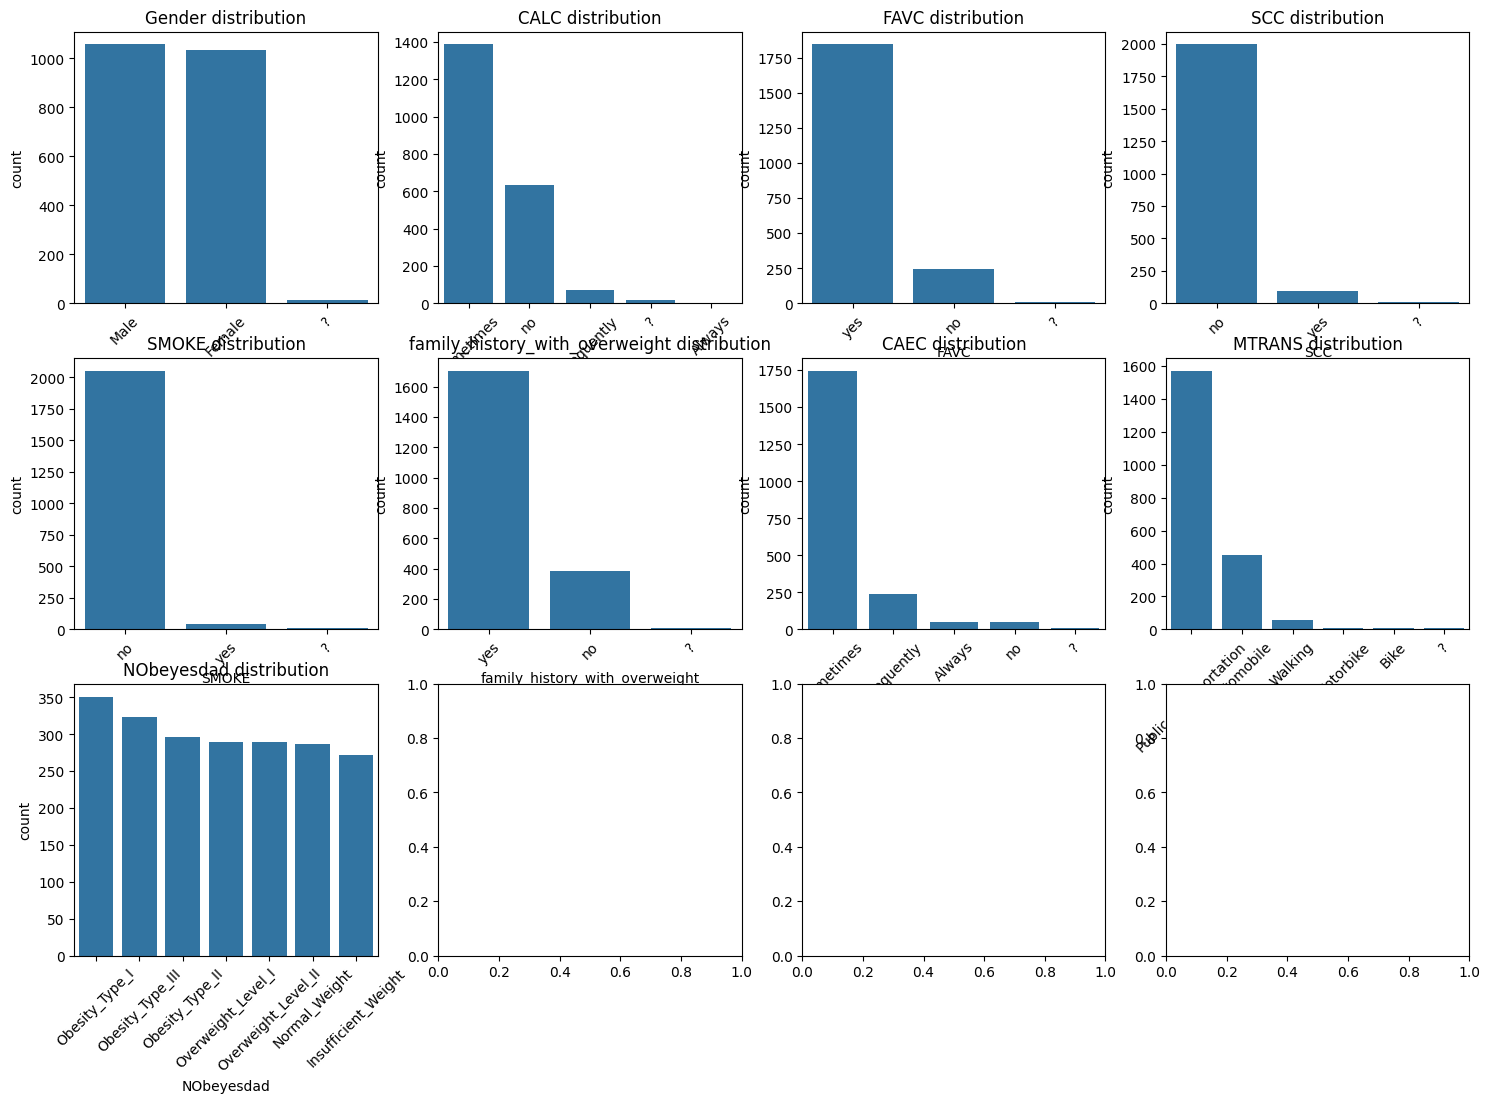

In [7]:
#plot kolom kategorikal(jumlah <= 20)
cat_cols = [c for c in df.select_dtypes('object').columns
            if df[c].nunique() <= 20]

n = len(cat_cols)
n_cols = 4
n_rows = int(np.ceil(n / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 4*n_rows))

for ax, col in zip(axes.flatten(), cat_cols):
    sns.countplot(data=df, x=col, ax=ax,
                  order=df[col].value_counts().index)
    ax.set_title(f'{col} distribution')
    ax.tick_params(axis='x', rotation=45)

In [8]:
#sumbu kosong
for ax in axes.flatten()[n:]:
    ax.remove()

plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [9]:
df.isnull().sum()

,0
Age,14
Gender,9
Height,12
Weight,11
CALC,5
FAVC,11
FCVC,8
NCP,12
SCC,10
SMOKE,5


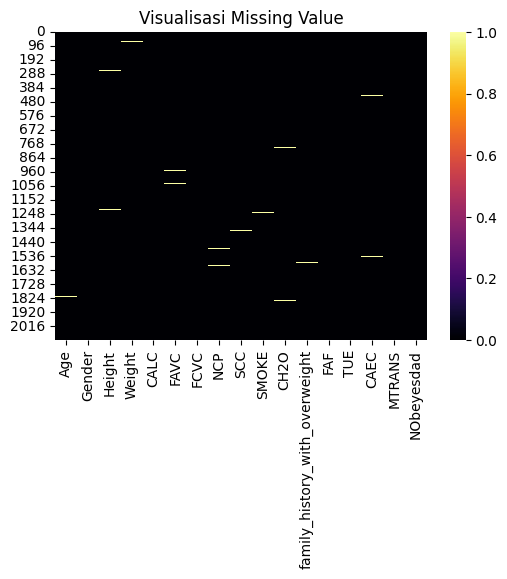

In [12]:
plt.figure(figsize = (6, 4))
sns.heatmap(df.isnull(), cbar=True, cmap='inferno')
plt.title('Visualisasi Missing Value')
plt.show()

In [11]:
print(df.duplicated().sum())
df[df.duplicated(keep=False)]

18


,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
97,21,Female,1.52,42,Sometimes,no,3,1,no,no,1,no,0,0,Frequently,Public_Transportation,Insufficient_Weight
98,21,Female,1.52,42,Sometimes,no,3,1,no,no,1,no,0,0,Frequently,Public_Transportation,Insufficient_Weight
145,21,Male,1.62,70,Sometimes,yes,2,1,no,no,3,no,1,0,no,Public_Transportation,Overweight_Level_I
174,21,Male,1.62,70,Sometimes,yes,2,1,no,no,3,no,1,0,no,Public_Transportation,Overweight_Level_I
179,21,Male,1.62,70,Sometimes,yes,2,1,no,no,3,no,1,0,no,Public_Transportation,Overweight_Level_I
184,21,Male,1.62,70,Sometimes,yes,2,1,no,no,3,no,1,0,no,Public_Transportation,Overweight_Level_I
282,18,Female,1.62,55,no,yes,2,3,no,no,1,yes,1,1,Frequently,Public_Transportation,Normal_Weight
295,16,Female,1.66,58,no,no,2,1,no,no,1,no,0,1,Sometimes,Walking,Normal_Weight
309,16,Female,1.66,58,no,no,2,1,no,no,1,no,0,1,Sometimes,Walking,Normal_Weight
460,18,Female,1.62,55,no,yes,2,3,no,no,1,yes,1,1,Frequently,Public_Transportation,Normal_Weight


In [14]:
for col in df.columns:
    print(f'{col}')
    print(f'Jumlah nilai unik: {df[col].nunique()}')
    print(f'Nilai paling sering muncul (modus): {df[col].mode().values[0]}')
    print(f'{df[col].unique()}\n')

Age
Jumlah nilai unik: 1394
Nilai paling sering muncul (modus): 18
['21' '23' '27' ... '22.524036' '24.361936' '23.664709']

Gender
Jumlah nilai unik: 3
Nilai paling sering muncul (modus): Male
['Female' 'Male' '?' nan]

Height
Jumlah nilai unik: 1562
Nilai paling sering muncul (modus): 1.7
['1.62' '1.52' '1.8' ... '1.752206' '1.73945' '1.738836']

Weight
Jumlah nilai unik: 1518
Nilai paling sering muncul (modus): 80
['64' '56' '77' ... '133.689352' '133.346641' '133.472641']

CALC
Jumlah nilai unik: 5
Nilai paling sering muncul (modus): Sometimes
['no' 'Sometimes' 'Frequently' '?' 'Always' nan]

FAVC
Jumlah nilai unik: 3
Nilai paling sering muncul (modus): yes
['no' 'yes' '?' nan]

FCVC
Jumlah nilai unik: 808
Nilai paling sering muncul (modus): 3
['2' '3' '1' nan '?' '8.148992744163786' '8.42397392777979' '2.450218'
 '2.880161' '2.00876' '2.596579' '2.591439' '2.392665' '1.123939'
 '2.027574' '2.658112' '2.88626' '2.714447' '2.750715' '1.4925' '2.205439'
 '2.059138' '2.310423' '2.8231

In [15]:
# Konversi kolom menjadi numerik
cols_to_convert = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

for col in cols_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df[cols_to_convert].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     2089 non-null   float64
 1   Height  2089 non-null   float64
 2   Weight  2092 non-null   float64
 3   FCVC    2093 non-null   float64
 4   NCP     2089 non-null   float64
 5   CH2O    2096 non-null   float64
 6   FAF     2092 non-null   float64
 7   TUE     2096 non-null   float64
dtypes: float64(8)
memory usage: 132.1 KB


In [16]:
# Statistik kolom numerik
print(df[['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']].describe())

               Age       Height       Weight         FCVC          NCP  \
count  2089.000000  2089.000000  2092.000000  2093.000000  2089.000000   
mean     24.717928     1.706623    88.608184     2.443519     2.729418   
std       8.391323     0.117700    36.154617     0.642754     0.981124   
min      14.000000     1.450000    39.000000     1.000000     1.000000   
25%      19.955257     1.630000    66.000000     2.000000     2.675411   
50%      22.814657     1.701284    83.000000     2.397284     3.000000   
75%      26.000000     1.770000   108.055736     3.000000     3.000000   
max     106.441252     2.853986   441.131078     8.706795    12.299828   

              CH2O          FAF          TUE  
count  2096.000000  2092.000000  2096.000000  
mean      2.030560     1.073435     0.680138  
std       0.737945     1.149364     0.717160  
min       1.000000     0.000000     0.000000  
25%       1.569911     0.129009     0.000000  
50%       2.000000     1.000000     0.625360  
75% 

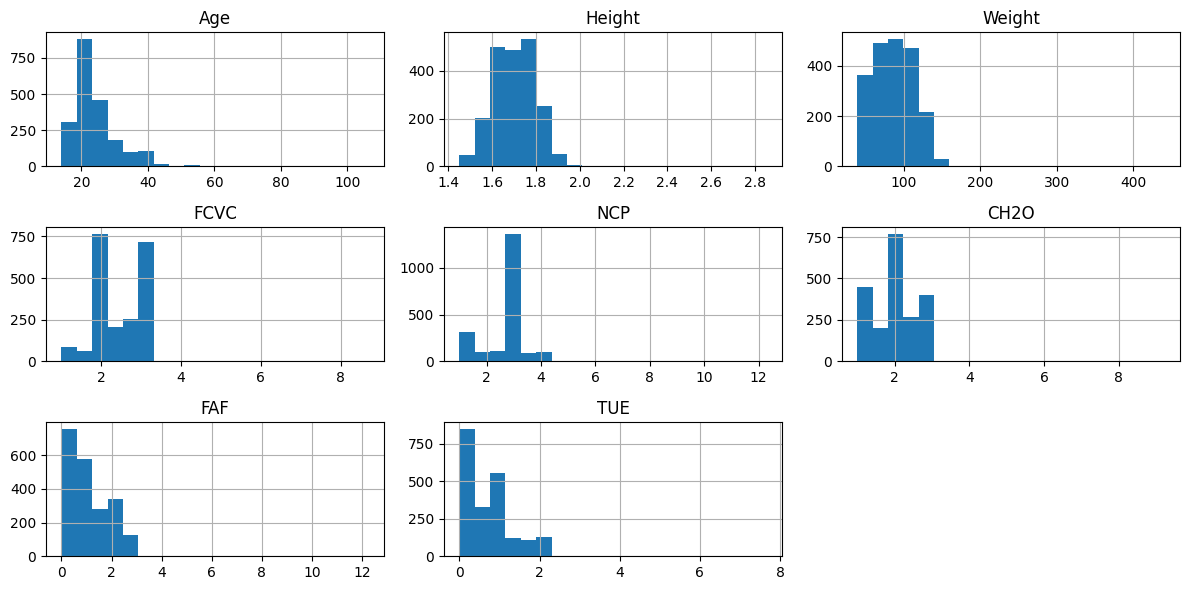

In [17]:
# Visualisasi
df[['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']].hist(bins=20, figsize=(12, 6))
plt.tight_layout()
plt.show()

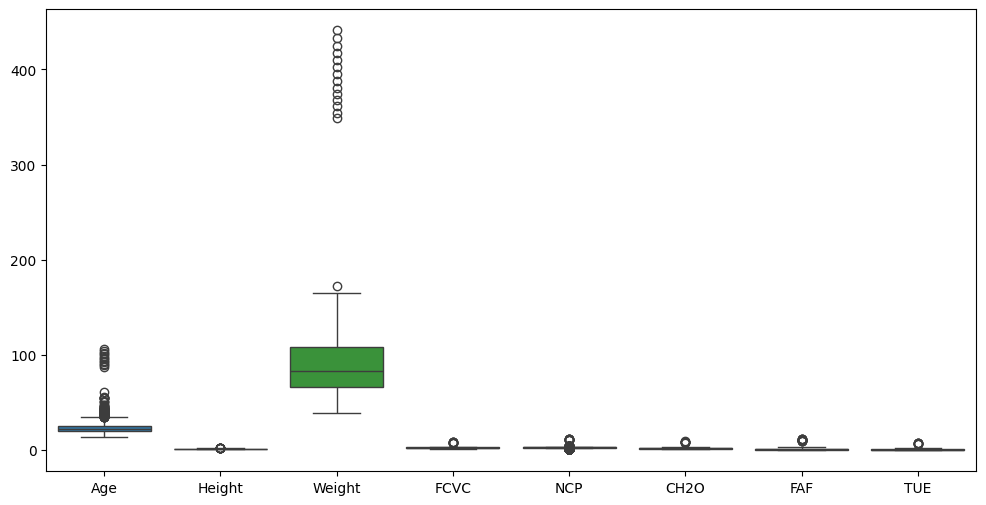

In [18]:
# Visualisasi deteksi outlier
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']])
plt.show()

In [19]:
# distribusi kelas kolom target
print("\nDistribusi Kelas pada Kolom Target 'NObeyesdad':")
print(df['NObeyesdad'].value_counts())


Distribusi Kelas pada Kolom Target 'NObeyesdad':
NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64


# Pre - processing

In [20]:
df = df.drop_duplicates()
print(df.duplicated().sum())

0


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2093 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2071 non-null   float64
 1   Gender                          2084 non-null   object 
 2   Height                          2071 non-null   float64
 3   Weight                          2074 non-null   float64
 4   CALC                            2088 non-null   object 
 5   FAVC                            2082 non-null   object 
 6   FCVC                            2075 non-null   float64
 7   NCP                             2071 non-null   float64
 8   SCC                             2083 non-null   object 
 9   SMOKE                           2088 non-null   object 
 10  CH2O                            2078 non-null   float64
 11  family_history_with_overweight  2080 non-null   object 
 12  FAF                             2074 no

# Menghapus nilai unique(tidak valid)

In [22]:
column = ["Gender", "CALC", "FAVC",	"SCC",	"SMOKE",	"family_history_with_overweight",	"CAEC", "MTRANS",	"NObeyesdad"]
for col in column:
    print(f"Kolom: {col}")
    print(df[col].unique())
    print("-" * 40)

Kolom: Gender
['Female' 'Male' '?' nan]
----------------------------------------
Kolom: CALC
['no' 'Sometimes' 'Frequently' '?' 'Always' nan]
----------------------------------------
Kolom: FAVC
['no' 'yes' '?' nan]
----------------------------------------
Kolom: SCC
['no' 'yes' nan '?']
----------------------------------------
Kolom: SMOKE
['no' 'yes' '?' nan]
----------------------------------------
Kolom: family_history_with_overweight
['yes' 'no' nan '?']
----------------------------------------
Kolom: CAEC
['Sometimes' 'Frequently' 'Always' 'no' nan '?']
----------------------------------------
Kolom: MTRANS
['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike' '?' nan]
----------------------------------------
Kolom: NObeyesdad
['Normal_Weight' 'Overweight_Level_I' 'Overweight_Level_II'
 'Obesity_Type_I' 'Insufficient_Weight' 'Obesity_Type_II'
 'Obesity_Type_III']
----------------------------------------


In [23]:
# Ganti ? menjadi np.nan pada kolom-kolom kategori
column = ["Gender", "CALC", "FAVC", "SCC", "SMOKE",
          "family_history_with_overweight", "CAEC", "MTRANS", "NObeyesdad"]

for col in column:
    df[col] = df[col].replace('?', np.nan)

# Jumlah missing value setelah dibersihkan
print(df[column].isnull().sum())

Gender                            22
CALC                              20
FAVC                              22
SCC                               18
SMOKE                             13
family_history_with_overweight    23
CAEC                              18
MTRANS                            12
NObeyesdad                         0
dtype: int64


In [25]:
num_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
cat_cols = ['Gender', 'CALC', 'FAVC', 'SCC', 'SMOKE',
            'family_history_with_overweight', 'CAEC', 'MTRANS']

In [26]:
# 1.c  Imputasi:   median utk numerik, modus utk kategori
num_imputer  = SimpleImputer(strategy='median')
cat_imputer  = SimpleImputer(strategy='most_frequent')

df[num_cols] = num_imputer.fit_transform(df[num_cols])
df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])

df.isnull().sum()

,0
Age,0
Gender,0
Height,0
Weight,0
CALC,0
FAVC,0
FCVC,0
NCP,0
SCC,0
SMOKE,0


# Winsorizing untuk menangani outliner

In [27]:
for col in num_cols:
    q1, q3 = df[col].quantile([0.25, 0.75])
    iqr    = q3 - q1
    lower  = q1 - 1.5 * iqr
    upper  = q3 + 1.5 * iqr
    df[col] = np.clip(df[col], lower, upper)

In [28]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000
mean,23.972207,1.703747,87.275684,2.431908,2.872690,2.007032,1.032473,0.668962
std,5.307733,0.094567,26.842484,0.547027,0.327303,0.615318,0.879946,0.616331
min,14.000000,1.450000,39.000000,1.000000,2.312530,1.000000,0.000000,0.000000
25%,19.979810,1.631662,66.000000,2.000000,2.725012,1.590418,0.130417,0.000000
50%,22.851721,1.701986,83.231077,2.416044,3.000000,2.000000,1.000000,0.630866
75%,26.000000,1.770000,108.044313,3.000000,3.000000,2.456939,1.683497,1.000000
max,35.030285,1.977507,171.110782,4.500000,3.412482,3.756721,4.013117,2.500000


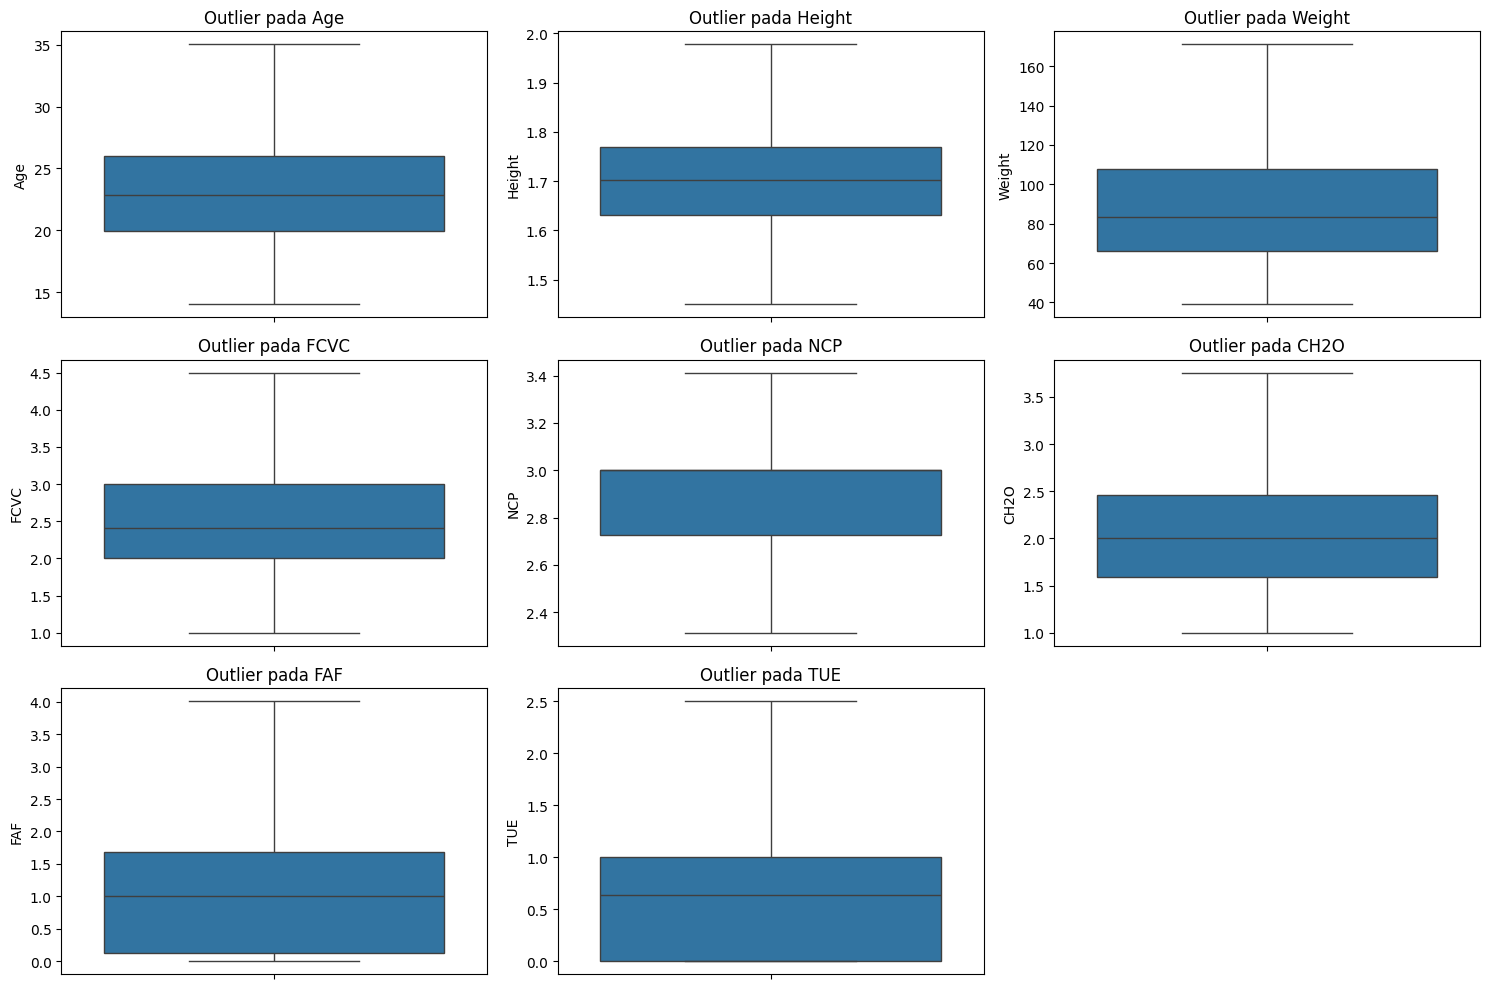

In [29]:
numeric_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f'Outlier pada {col}')
plt.tight_layout()
plt.show()

# Mengubah dari kategorikal menjadi numerik (Encoding)

In [30]:
column = ["Gender", "CALC", "FAVC",	"SCC",	"SMOKE",	"family_history_with_overweight",	"CAEC", "MTRANS",	"NObeyesdad"]
for col in column:
    print(f"Kolom: {col}")
    print(df[col].unique())
    print("-" * 40)

Kolom: Gender
['Female' 'Male']
----------------------------------------
Kolom: CALC
['no' 'Sometimes' 'Frequently' 'Always']
----------------------------------------
Kolom: FAVC
['no' 'yes']
----------------------------------------
Kolom: SCC
['no' 'yes']
----------------------------------------
Kolom: SMOKE
['no' 'yes']
----------------------------------------
Kolom: family_history_with_overweight
['yes' 'no']
----------------------------------------
Kolom: CAEC
['Sometimes' 'Frequently' 'Always' 'no']
----------------------------------------
Kolom: MTRANS
['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike']
----------------------------------------
Kolom: NObeyesdad
['Normal_Weight' 'Overweight_Level_I' 'Overweight_Level_II'
 'Obesity_Type_I' 'Insufficient_Weight' 'Obesity_Type_II'
 'Obesity_Type_III']
----------------------------------------


In [31]:
label_encoders = {}
for col in df.select_dtypes(include="object").columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [32]:
column = ["Gender", "CALC", "FAVC",	"SCC",	"SMOKE",	"family_history_with_overweight",	"CAEC", "MTRANS",	"NObeyesdad"]
for col in column:
    print(f"Kolom: {col}")
    print(df[col].unique())
    print("-" * 40)

Kolom: Gender
[0 1]
----------------------------------------
Kolom: CALC
[3 2 1 0]
----------------------------------------
Kolom: FAVC
[0 1]
----------------------------------------
Kolom: SCC
[0 1]
----------------------------------------
Kolom: SMOKE
[0 1]
----------------------------------------
Kolom: family_history_with_overweight
[1 0]
----------------------------------------
Kolom: CAEC
[2 1 0 3]
----------------------------------------
Kolom: MTRANS
[3 4 0 2 1]
----------------------------------------
Kolom: NObeyesdad
[1 5 6 2 0 3 4]
----------------------------------------


In [33]:
df.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,0,1.62,64.0,3,0,2.0,3.00000,0,0,2.0,1,0.0,1.0,2,3,1
1,21.0,0,1.52,56.0,2,0,3.0,3.00000,1,1,3.0,1,3.0,0.0,2,3,1
2,23.0,1,1.80,77.0,1,0,2.0,3.00000,0,0,2.0,1,2.0,1.0,2,3,1
3,27.0,1,1.80,87.0,1,0,3.0,3.00000,0,0,2.0,0,2.0,0.0,2,4,5
4,22.0,1,1.78,89.8,2,0,2.0,2.31253,0,0,2.0,0,0.0,0.0,2,3,6


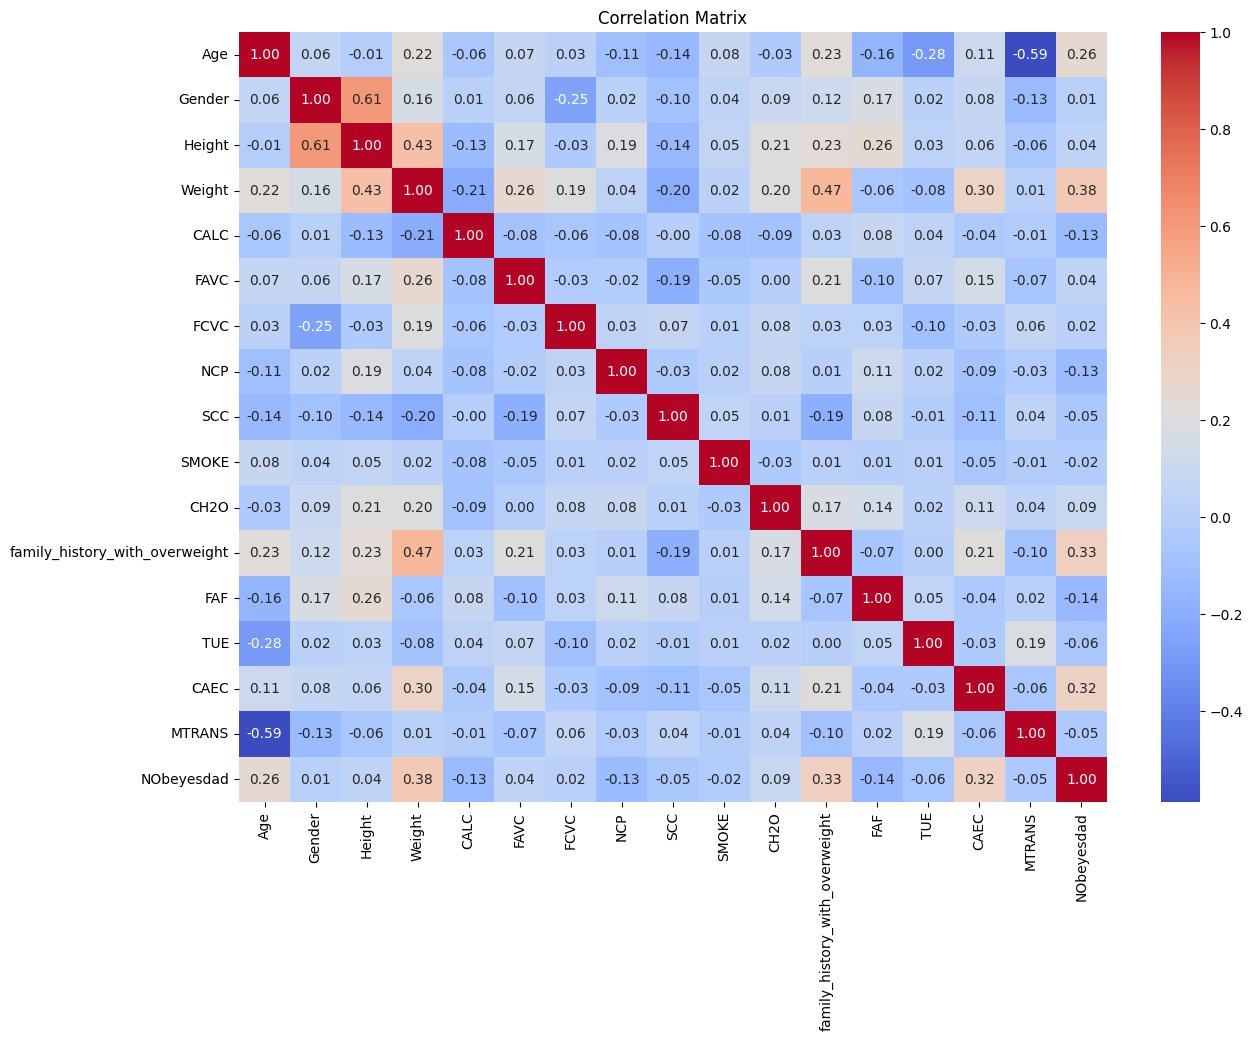

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [35]:
# Korelasi antara fitur numerik dan target
corr = df.corr(numeric_only=True)

# Cek fitur dengan korelasi rendah ke target
print(corr["NObeyesdad"].sort_values())

FAF                              -0.136764
CALC                             -0.131190
NCP                              -0.126906
TUE                              -0.063827
SCC                              -0.049996
MTRANS                           -0.046732
SMOKE                            -0.022741
Gender                            0.012436
FCVC                              0.020544
FAVC                              0.039574
Height                            0.041380
CH2O                              0.087193
Age                               0.261181
CAEC                              0.316037
family_history_with_overweight    0.332586
Weight                            0.378876
NObeyesdad                        1.000000
Name: NObeyesdad, dtype: float64


In [36]:
X = df.drop('NObeyesdad', axis=1)
y = df['NObeyesdad']

In [37]:
# 1. Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [38]:
# 2. Scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [39]:
# Tampilkan beberapa data hasil scaling (train)
print("Contoh data X_train setelah scaling:")
print(pd.DataFrame(X_train_scaled, columns=X.columns).head())

Contoh data X_train setelah scaling:
        Age  Gender    Height    Weight      CALC  FAVC      FCVC       NCP  \
0  0.524780     1.0  0.792992  0.622545  0.666667   1.0  0.465753  0.625000   
1  0.258801     0.0  0.297105  0.325484  0.666667   1.0  0.023310  0.507414   
2  0.475505     1.0  0.723608  0.355762  0.666667   1.0  0.285714  0.000000   
3  0.424484     1.0  0.544808  0.426051  1.000000   1.0  0.285714  0.625000   
4  0.499824     1.0  0.749063  0.623040  0.666667   1.0  0.544648  0.528761   

   SCC  SMOKE      CH2O  family_history_with_overweight       FAF       TUE  \
0  0.0    0.0  0.711022                             1.0  0.338009  0.000000   
1  0.0    0.0  0.042645                             1.0  0.000000  0.646730   
2  0.0    0.0  0.362750                             1.0  0.498366  0.400000   
3  0.0    0.0  0.555116                             1.0  0.720433  0.514847   
4  0.0    0.0  0.520723                             1.0  0.249183  0.144864   

       CAEC  

In [40]:
# 3. SMOTE pada data train
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)

In [41]:
# 3. SMOTE pada data train
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)

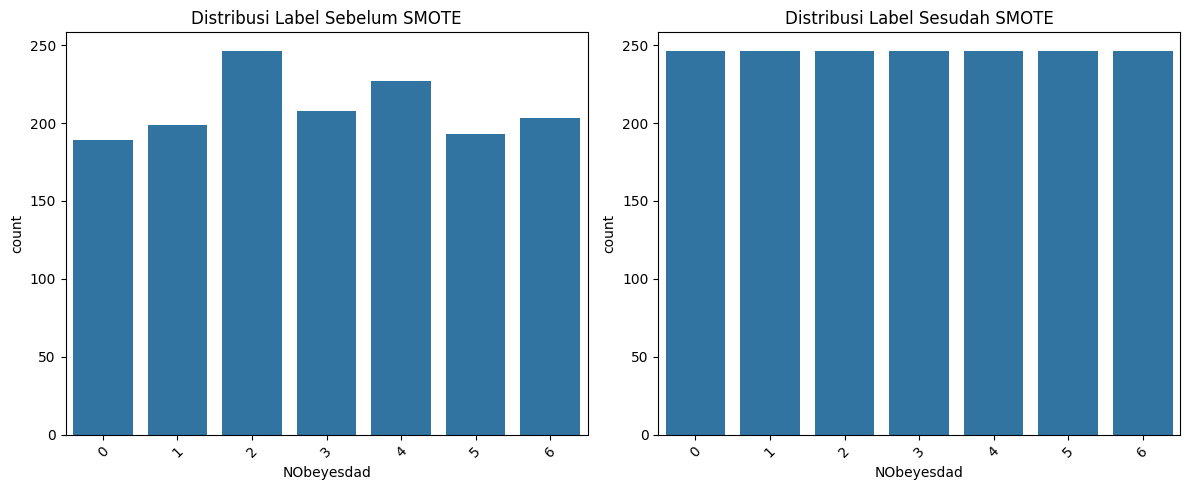

In [42]:
# Visualisasi distribusi label sebelum dan sesudah SMOTE
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Sebelum SMOTE
sns.countplot(x=y_train, ax=axes[0])
axes[0].set_title('Distribusi Label Sebelum SMOTE')
axes[0].tick_params(axis='x', rotation=45)

# Sesudah SMOTE
sns.countplot(x=y_train_res, ax=axes[1])
axes[1].set_title('Distribusi Label Sesudah SMOTE')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [43]:
# Contoh data hasil SMOTE (train)
df_train_res = pd.DataFrame(X_train_res, columns=X.columns)
df_train_res['NObeyesdad'] = y_train_res.values
print("Contoh data train setelah SMOTE:")

df_train_res.head(20)

Contoh data train setelah SMOTE:


,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,0.524780,1.0,0.792992,0.622545,0.666667,1.0,0.465753,0.625000,0.0,0.0,0.711022,1.0,0.338009,0.000000,0.666667,0.75,3
1,0.258801,0.0,0.297105,0.325484,0.666667,1.0,0.023310,0.507414,0.0,0.0,0.042645,1.0,0.000000,0.646730,0.666667,0.75,2
2,0.475505,1.0,0.723608,0.355762,0.666667,1.0,0.285714,0.000000,0.0,0.0,0.362750,1.0,0.498366,0.400000,0.000000,0.75,5
3,0.424484,1.0,0.544808,0.426051,1.000000,1.0,0.285714,0.625000,0.0,0.0,0.555116,1.0,0.720433,0.514847,0.666667,0.75,2
4,0.499824,1.0,0.749063,0.623040,0.666667,1.0,0.544648,0.528761,0.0,0.0,0.520723,1.0,0.249183,0.144864,0.666667,0.75,3
5,0.556185,1.0,0.672746,0.518956,0.666667,1.0,0.548921,0.625000,0.0,0.0,0.678139,1.0,0.045290,0.053409,0.666667,0.75,2
6,0.684933,1.0,0.617839,0.553882,0.666667,1.0,0.250929,0.625000,0.0,0.0,0.371069,1.0,0.000000,0.130178,0.666667,0.00,3
7,0.570606,0.0,0.323101,0.544389,0.666667,1.0,0.571429,0.625000,0.0,0.0,0.604406,1.0,0.000000,0.110763,0.666667,0.75,4
8,0.244290,0.0,0.475412,0.670970,0.666667,1.0,0.571429,0.625000,0.0,0.0,0.113843,1.0,0.227338,0.252346,0.666667,0.75,4
9,0.332853,1.0,0.381904,0.158958,0.666667,1.0,0.285714,0.625000,0.0,0.0,0.362750,1.0,0.498366,1.000000,0.333333,0.75,1


In [44]:
# Simpan ke file CSV
df_train_res.to_csv('data_preprocessed.csv', index=False)